# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('/datasets/query_1.csv')
df_3 = pd.read_csv('/datasets/query_3.csv')

#display(df_3.info())
display(df_1.info())
df_3['average_flights'] = df_3['average_flights'].astype('float16')
display(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float16
dtypes: float16(1), object(1)
memory usage: 1.1+ KB


None

Пропусков в данных нет, типы данных в столбцах изменений не требуют.

Выведем топ-10 городов по количеству рейсов:

In [2]:
df_3_top = df_3.sort_values(by = 'average_flights', ascending = False).head(10)
display('топ-10 популярных городов по кол-ву рейсов:', df_3_top)

'топ-10 популярных городов по кол-ву рейсов:'

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


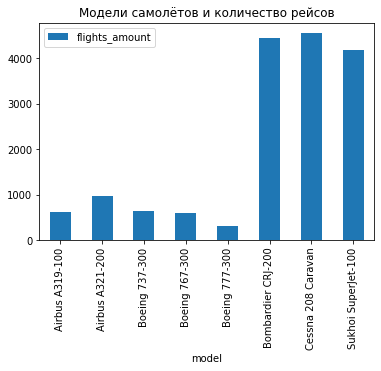

In [3]:
bar1 = df_1.plot( kind= 'bar', x = 'model', y = 'flights_amount', title = 'Модели самолётов и количество рейсов')

Как можно наблюдать из графика, основными рабочими лошадками авиакомпании являются Bombardier CRJ-200, Cessna 208 Caravan, SU Superjet-100. У каждой из этих машин около 4000 рейсов, тогда как у идущего следом по количеству Airbus A321 в 4 раза меньше.

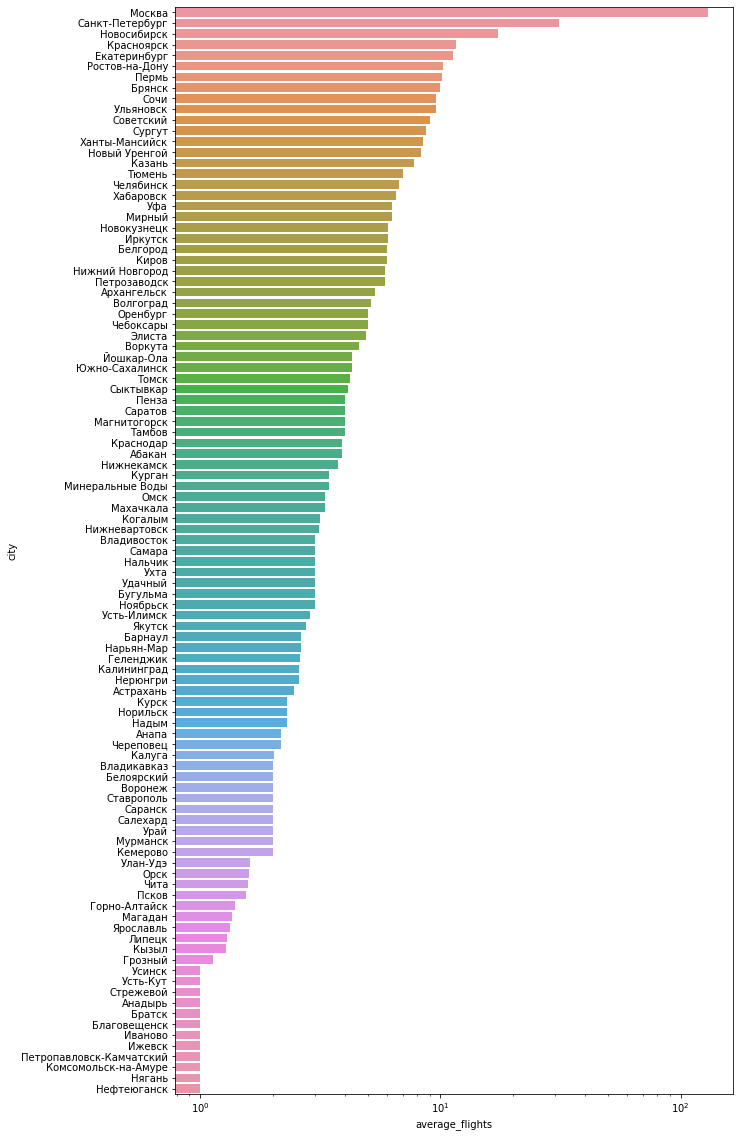

In [4]:
#bar1 = df_3.plot( kind= 'bar', x = 'average_flights', y = 'city', title = 'Города и количество рейсов', figsize=(20, 6))
df_3 = df_3.sort_values(by = 'average_flights', ascending = False)
plt.figure(figsize=(10,20))
x = sns.barplot(x = 'average_flights', y = 'city', data = df_3, label = 'Города и количество рейсов') 
x.set_xscale('log')

Из графика можно пронаблюдать, что сильно по количеству рейсов вырываются Москва и Петербург. Остальные крупныегорода отвечают за существенно меньшее количество трафика. На местах 3-5 Екатеринбург, Новосибирск, Красноярск. Рассмотрим топ-10 более подробно ниже.

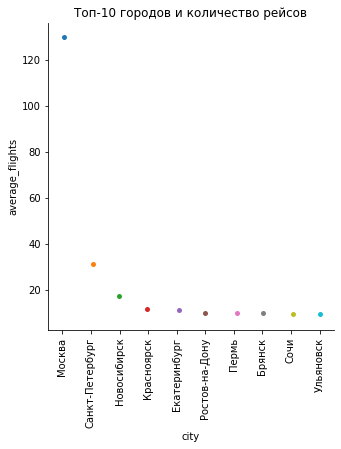

In [5]:
sc1 = sns.catplot(x="city", y="average_flights", data=df_3_top, label = "Топ-10 городов и количество рейсов").set(title = 'Топ-10 городов и количество рейсов')
#sc1.set
plt.xticks(rotation=90)
plt.show()

Как и упоминалось ранее, лидером по перевозкам является Москва с более чем 120 рейсами. Ближайший Петербург отстает почти в 4 раза с примерно 35 рейсами. У остальных городов и того меньше - ни один из них не имеет более, чем 20 рейсов за сентябрь 2018.

Традиционно, Москва и Петербург остаются крупнейшими транспортными хабами, в том числе, когда это касается культурных событий. Города-миллионники Сибири и Урала следуют за ними, причем можно прослеживается корреляция между населением этих городов и спроса на перелеты. Менее популярны среднего размера города и курортные зоны, где также возможно проведение фестивалей на регулярной основе.